In [1]:
import torch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sgld
import os

In [5]:
basedir = '../experiments/'

In [6]:
withnoise = sgld.make_dict('withnoise_best_0', basedir)
nonoise = sgld.make_dict('nonoise_best_0', basedir)

In [7]:
nonoise.keys()

dict_keys(['acc', 'loss', 'val', 'histo'])

In [8]:
nonoise['val'][-1]

95.464601769911511

Text(0,0.5,'Mean Squared Error')

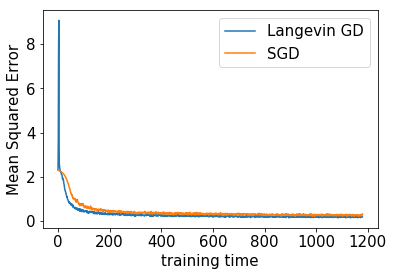

In [81]:
plt.plot(withnoise['loss'], label='Langevin GD')
plt.plot(nonoise['loss'], label='SGD')
plt.legend()
plt.xlabel('training time')
plt.ylabel('Mean Squared Error')

In [10]:
noisy_std = sgld.apply_rolling2D(withnoise['histo'],
                    lambda x: np.std(x, axis=1), 40)
clean_std = sgld.apply_rolling2D(nonoise['histo'],
                    lambda x: np.std(x, axis=1), 40)

In [11]:
maxi_noisy = np.max(noisy_std, axis=1)
maxi_clean = np.max(clean_std, axis=1)

Text(0,0.5,'Max Std. Error')

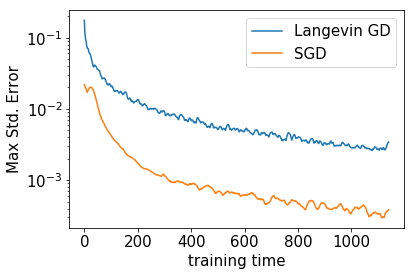

In [86]:
plt.semilogy(maxi_noisy, label='Langevin GD')
plt.semilogy(maxi_clean, label='SGD')
plt.legend()
plt.xlabel('training time')
plt.ylabel('Max Std. Error')

In [13]:
noisy_id = sgld.apply_rolling2D(withnoise['histo'][:, :2000],
                               lambda x: x, 100, stack=False)
clean_id = sgld.apply_rolling2D(nonoise['histo'][:, :2000],
                               lambda x: x, 100, stack=False)


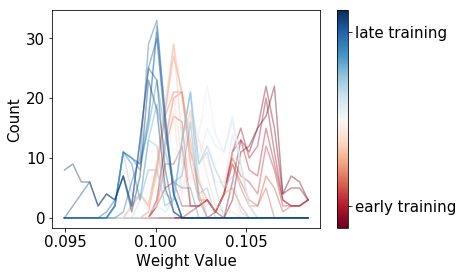

In [76]:
plt.rc('font', size=15)
delta = sgld.plot_densities(noisy_id[3], n_indices=30, 
                            n_bins=30, 
                            alpha=.4,
                           burnin=600)

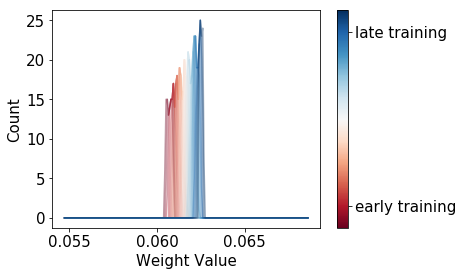

0.013951212167739875

In [75]:
sgld.plot_densities(clean_id[3], n_indices=30,
                    n_bins=200,
                    alpha=.4, 
                    delta=delta,
                   burnin=600)